<a href="https://colab.research.google.com/github/POOJA1980/cosmetic-brand-product-/blob/main/data_mining_and_predictive_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score




from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Planilha sem ttulo - cscpopendata.csv')

In [ ]:
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,41524,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,41523,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,41523,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80238 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114419 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CDPHId,114635.0,20304.858987,12489.052554,2.0,8717.0,20895.0,31338.50,41524.0
CSFId,80662.0,32608.658377,19089.443910,1.0,15789.0,32541.0,48717.75,65009.0
CompanyId,114635.0,450.641532,409.533093,4.0,86.0,297.0,798.00,1391.0
PrimaryCategoryId,114635.0,51.076294,20.474341,1.0,44.0,44.0,59.00,111.0
SubCategoryId,114635.0,66.819252,35.822097,3.0,48.0,52.0,65.00,172.0
CasId,114635.0,674.094107,149.214101,2.0,656.0,656.0,656.00,1242.0
ChemicalId,114635.0,32837.556959,20439.412299,0.0,13990.0,32055.0,51578.50,68074.0
ChemicalCount,114635.0,1.288359,0.636418,0.0,1.0,1.0,1.00,9.0


In [ ]:
#Check for null values in the dataset
df.isnull().sum()

CDPHId                         0
ProductName                    0
CSFId                      33973
CSF                        34397
CompanyId                      0
CompanyName                    0
BrandName                    216
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6476
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101715
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111650
ChemicalCount                  0
dtype: int64

In [ ]:
#Checking the number of unique values
df.select_dtypes(include='int64').nunique()

CDPHId               36972
CompanyId              635
PrimaryCategoryId       13
SubCategoryId           92
CasId                  134
ChemicalId           58079
ChemicalCount           10
dtype: int64

In [ ]:
#Checking the number of unique values
df.select_dtypes(include='object').nunique()

ProductName               33716
CSF                       34244
CompanyName                 606
BrandName                  2714
PrimaryCategory              13
SubCategory                  89
CasNumber                   125
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
dtype: int64

In [ ]:
#check duplicate values
df.duplicated().sum()

215

DATA PREPROCESS

In [ ]:
#drop the duplicated values
df.drop_duplicates()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,41524,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,41523,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,41523,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,5,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,4,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,3,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,3,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


In [ ]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName', 'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId', 'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName', 'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate', 'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved', 'ChemicalCount']


In [ ]:
# Drop the not needed columns from the original DataFrame
df = df.drop(['ChemicalDateRemoved', 'DiscontinuedDate'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80238 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114419 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [ ]:
# Drop all rows with null values from the original DataFrame
df.dropna(inplace=True)

In [ ]:
# Drop the month columns
month_columns = [col for col in df.columns if '_Month' in col]
df.drop(month_columns, axis=1, inplace=True)
# Drop the 'CSF' column
df.drop('CSF', axis=1, inplace=True)

In [ ]:
#remove the columns which are the same, (cdphID & product name), (csfid &csf), (company id and company name), (primary category id and primary category), (sub category id and sub category),(CasNumber, CasID and Chemical Name)
df = df.drop(['CDPHId', 'CSFId','CompanyId','PrimaryCategoryId','ChemicalId','SubCategoryId','CasNumber','CasId'], axis=1)

# Display the updated DataFrame
df.head()

,ProductName,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,InitialDateReported,MostRecentDateReported,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalCount
6,ABSOLUTE Precision Color Powder System - All S...,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,07/13/2009,12/30/2010,12/04/2009,12/04/2009,1
7,ABSOLUTE Precision Color Powder System - All S...,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,07/13/2009,12/30/2010,12/04/2009,12/04/2009,1
8,ABSOLUTE Precision Color Powder System - All S...,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,07/13/2009,12/30/2010,12/04/2009,12/04/2009,1
9,ABSOLUTE Precision Color Powder System Opaque ...,OPI PRODUCTS INC.,ABSOLUTE,Nail Products,Artificial Nails and Related Products,Titanium dioxide,07/13/2009,12/30/2010,06/09/2010,06/09/2010,1
11,ABSOLUTE Precision Color Powder System Translu...,OPI PRODUCTS INC.,ABSOLUTE,Nail Products,Artificial Nails and Related Products,Titanium dioxide,07/13/2009,12/30/2010,06/09/2010,06/09/2010,1


In [ ]:
#Checking the number of unique values
df.select_dtypes(include='int64').nunique()

ChemicalCount    7
dtype: int64

In [ ]:
# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each column in the DataFrame
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

Data Visualization

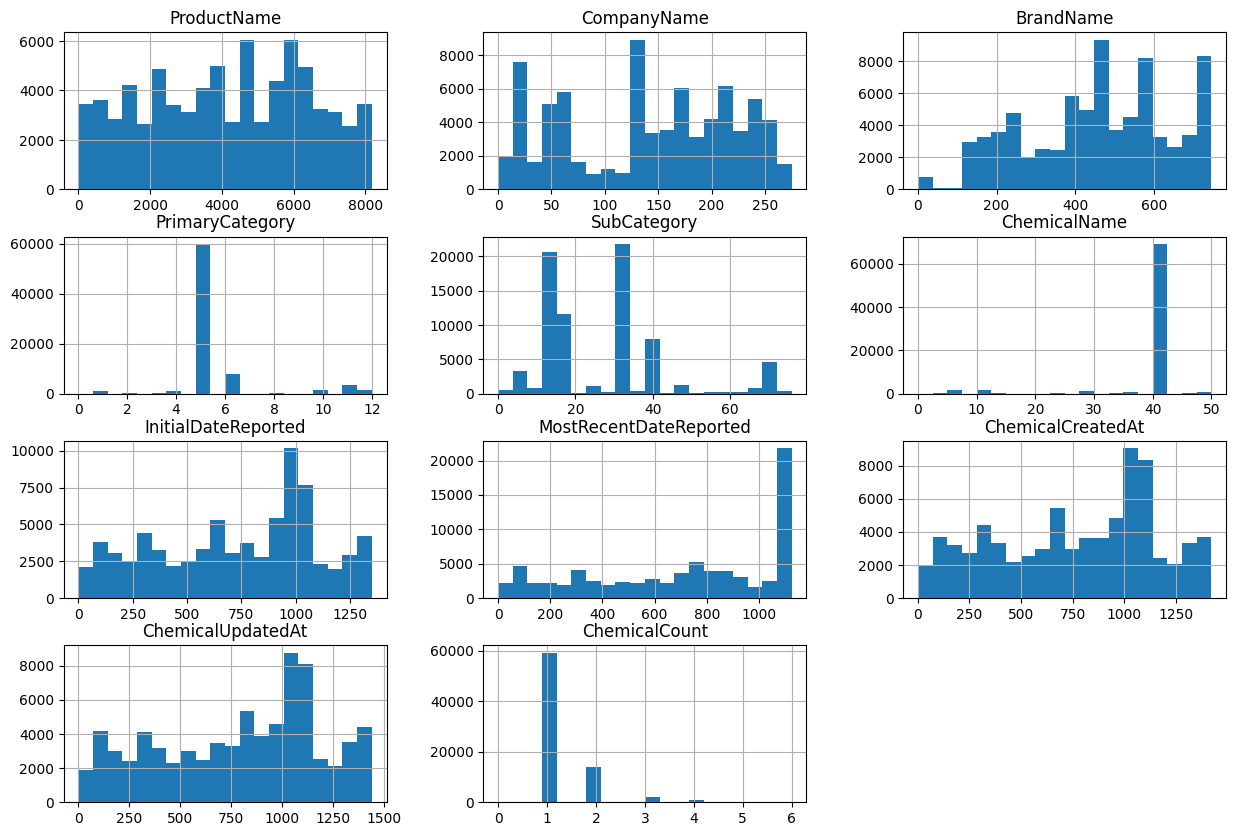

In [ ]:
numeric_columns = df.select_dtypes(include=['int64','float64'])
numeric_columns.hist(bins=20, figsize=(15, 10))
plt.show()

In [ ]:
df.head()

,ProductName,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,InitialDateReported,MostRecentDateReported,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalCount
6,138,176,502,6,3,42,679,1120,1311,1328,1
7,138,176,502,6,3,42,679,1120,1311,1328,1
8,138,176,502,6,3,42,679,1120,1311,1328,1
9,139,176,11,6,3,42,679,1120,602,595,1
11,140,176,11,6,3,42,679,1120,602,595,1


In [ ]:
# Check the number of unique values for each column
print(df.nunique())

ProductName               8183
CompanyName                276
BrandName                  747
PrimaryCategory             13
SubCategory                 77
ChemicalName                51
InitialDateReported       1351
MostRecentDateReported    1126
ChemicalCreatedAt         1424
ChemicalUpdatedAt         1441
ChemicalCount                7
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76603 entries, 6 to 114633
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ProductName             76603 non-null  int64
 1   CompanyName             76603 non-null  int64
 2   BrandName               76603 non-null  int64
 3   PrimaryCategory         76603 non-null  int64
 4   SubCategory             76603 non-null  int64
 5   ChemicalName            76603 non-null  int64
 6   InitialDateReported     76603 non-null  int64
 7   MostRecentDateReported  76603 non-null  int64
 8   ChemicalCreatedAt       76603 non-null  int64
 9   ChemicalUpdatedAt       76603 non-null  int64
 10  ChemicalCount           76603 non-null  int64
dtypes: int64(11)
memory usage: 7.0 MB


In [ ]:
df.head()

,ProductName,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,InitialDateReported,MostRecentDateReported,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalCount
6,138,176,502,6,3,42,679,1120,1311,1328,1
7,138,176,502,6,3,42,679,1120,1311,1328,1
8,138,176,502,6,3,42,679,1120,1311,1328,1
9,139,176,11,6,3,42,679,1120,602,595,1
11,140,176,11,6,3,42,679,1120,602,595,1


In [ ]:
df.head()

,ProductName,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,InitialDateReported,MostRecentDateReported,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalCount
6,138,176,502,6,3,42,679,1120,1311,1328,1
7,138,176,502,6,3,42,679,1120,1311,1328,1
8,138,176,502,6,3,42,679,1120,1311,1328,1
9,139,176,11,6,3,42,679,1120,602,595,1
11,140,176,11,6,3,42,679,1120,602,595,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76603 entries, 6 to 114633
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ProductName             76603 non-null  int64
 1   CompanyName             76603 non-null  int64
 2   BrandName               76603 non-null  int64
 3   PrimaryCategory         76603 non-null  int64
 4   SubCategory             76603 non-null  int64
 5   ChemicalName            76603 non-null  int64
 6   InitialDateReported     76603 non-null  int64
 7   MostRecentDateReported  76603 non-null  int64
 8   ChemicalCreatedAt       76603 non-null  int64
 9   ChemicalUpdatedAt       76603 non-null  int64
 10  ChemicalCount           76603 non-null  int64
dtypes: int64(11)
memory usage: 7.0 MB


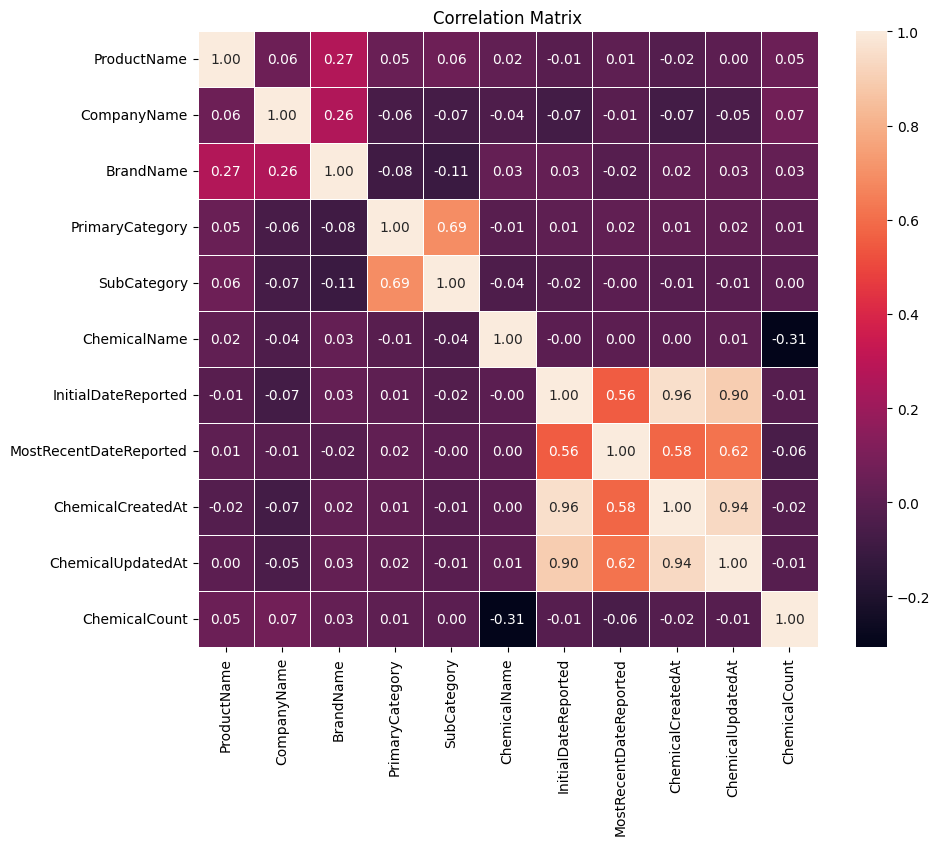

In [ ]:
# Plot the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 'ChemicalCount' is the target variable
X = df.drop('ChemicalCount', axis=1)  # Features
y = df['ChemicalCount']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MAE: 0.38265555535816026
MSE: 0.3100772239987663
R-squared: 0.10587734620697242


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")
print(f'R-squared: {r2}')

Linear Regression Mean Squared Error: 0.31
Linear Regression Mean Absolute Error: 0.38
R-squared: 0.10587734620697242


Random Forest Regresson


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split= 5)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, rf_predictions)
mae = mean_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

# Perform k-fold cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_cv_scores)

# Print the metrics
print("Random Forest Regression Cross-Validation RMSE Scores:", rf_rmse_scores)
print("Mean RMSE:", rf_rmse_scores.mean())


y_pred_rf = rf_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test R-squared:", r2_score(y_test, y_pred_rf))

Random Forest Regression Cross-Validation RMSE Scores: [0.29433243 0.30399753 0.30093537 0.30744945 0.30351282]
Mean RMSE: 0.30204551818224795
Test RMSE: 0.2996144944370005
Test MAE: 0.1493834804566019
Test R-squared: 0.7411471983279454


In [ ]:
#  Select random 10 rows
random_rows = df.sample(10, random_state=42)  # You can adjust the random_state for reproducibility

#  Use trained models to predict Chemical Count
random_rows_X = random_rows.drop('ChemicalCount', axis=1)

# Linear Regression
lr_predictions = lr_model.predict(random_rows_X)

# Random Forest Regression
rf_predictions = rf_model.predict(random_rows_X)

#Create a table
prediction_table = pd.DataFrame({
    'Actual_ChemicalCount': random_rows['ChemicalCount'].values,
    'Linear_Regression': lr_predictions,
    'RandomForest_Regression': rf_predictions,
})

# Display the prediction table
print(prediction_table)

   Actual_ChemicalCount  Linear_Regression  RandomForest_Regression
0                     1           1.225151                 1.046766
1                     1           1.174775                 1.006492
2                     2           1.937053                 1.908706
3                     1           1.247053                 1.029369
4                     1           1.224093                 1.025539
5                     1           1.275135                 1.048574
6                     1           1.312250                 1.558399
7                     1           1.207449                 1.073386
8                     1           1.301222                 1.142450
9                     1           1.332287                 1.106268
